# **Dataset loading**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshithawork","key":"2a8a58f04b0f76977865a2f20916dd83"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ryandpark/fruit-quality-classification

Dataset URL: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification
License(s): CC0-1.0


In [ ]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
dataset_path = "fruit-quality-classification.zip"  # Ensure this matches the downloaded filename
extract_path = "fruit_quality_data"  # Folder to extract to

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['Mixed Qualit_Fruits', 'Bad Quality_Fruits', 'Good Quality_Fruits']

In [ ]:
directories = [
    "fruit_quality_data/Bad Quality_Fruits/Apple_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Banana_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Guava_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Lime_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Orange_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad",
    "fruit_quality_data/Good Quality_Fruits/Apple_Good",
    "fruit_quality_data/Good Quality_Fruits/Banana_Good",
    "fruit_quality_data/Good Quality_Fruits/Guava_Good",
    "fruit_quality_data/Good Quality_Fruits/Lime_Good",
    "fruit_quality_data/Good Quality_Fruits/Orange_Good",
    "fruit_quality_data/Good Quality_Fruits/Pomegranate_Good",
    "fruit_quality_data/Mixed Qualit_Fruits/Apple",
    "fruit_quality_data/Mixed Qualit_Fruits/Banana",
    "fruit_quality_data/Mixed Qualit_Fruits/Guava",
    "fruit_quality_data/Mixed Qualit_Fruits/Lemon",
    "fruit_quality_data/Mixed Qualit_Fruits/Orange",
    "fruit_quality_data/Mixed Qualit_Fruits/Pomegranate",
]

# Count and print the number of images in each directory
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'fruit_quality_data/Bad Quality_Fruits/Apple_Bad': 1141
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Banana_Bad': 1087
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Guava_Bad': 1129
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Lime_Bad': 1085
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Orange_Bad': 1159
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad': 1187
Number of images in 'fruit_quality_data/Good Quality_Fruits/Apple_Good': 1149
Number of images in 'fruit_quality_data/Good Quality_Fruits/Banana_Good': 1113
Number of images in 'fruit_quality_data/Good Quality_Fruits/Guava_Good': 1152
Number of images in 'fruit_quality_data/Good Quality_Fruits/Lime_Good': 1094
Number of images in 'fruit_quality_data/Good Quality_Fruits/Orange_Good': 1216
Number of images in 'fruit_quality_data/Good Quality_Fruits/Pomegranate_Good': 5940
Number of images in 'fruit_quality_data/Mixed Qualit_Fruits/Ap

# **Dataset Preparation**

split the dataset only into bad good and mixed with all fruits

In [ ]:
original_dataset_dir = "fruit_quality_data"
dataset_dir = "dataset"
categories = ["Bad Quality_Fruits", "Good Quality_Fruits", "Mixed Qualit_Fruits"]

train_ratio, val_ratio = 0.7, 0.2

for category in categories:
    category_path = os.path.join(original_dataset_dir, category)
    images = []  # Store all images of this category

    # Collect images and print counts per subfolder
    for fruit_type in os.listdir(category_path):
        fruit_path = os.path.join(category_path, fruit_type)
        if os.path.isdir(fruit_path):
            fruit_images = [os.path.join(fruit_path, img) for img in os.listdir(fruit_path)]
            images.extend(fruit_images)

    # Split dataset
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Function to copy files safely
    def move_images(image_list, destination):
        os.makedirs(destination, exist_ok=True)
        for img_path in image_list:
            if os.path.exists(img_path):
                # Rename while copying to avoid overwriting
                new_filename = os.path.basename(os.path.dirname(img_path)) + "_" + os.path.basename(img_path)
                shutil.copy(img_path, os.path.join(destination, new_filename))

    # Move images
    move_images(train_images, os.path.join(dataset_dir, "train", category))
    move_images(val_images, os.path.join(dataset_dir, "val", category))
    move_images(test_images, os.path.join(dataset_dir, "test", category))

In [ ]:
directories = [
    "dataset/train/Bad Quality_Fruits",
    "dataset/train/Good Quality_Fruits",
    "dataset/train/Mixed Qualit_Fruits",
    "dataset/test/Bad Quality_Fruits",
    "dataset/test/Good Quality_Fruits",
    "dataset/test/Mixed Qualit_Fruits",
    "dataset/val/Bad Quality_Fruits",
    "dataset/val/Good Quality_Fruits",
    "dataset/val/Mixed Qualit_Fruits"
]
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'dataset/train/Bad Quality_Fruits': 4751
Number of images in 'dataset/train/Good Quality_Fruits': 8164
Number of images in 'dataset/train/Mixed Qualit_Fruits': 751
Number of images in 'dataset/test/Bad Quality_Fruits': 1019
Number of images in 'dataset/test/Good Quality_Fruits': 1750
Number of images in 'dataset/test/Mixed Qualit_Fruits': 162
Number of images in 'dataset/val/Bad Quality_Fruits': 1018
Number of images in 'dataset/val/Good Quality_Fruits': 1750
Number of images in 'dataset/val/Mixed Qualit_Fruits': 161
19526


# **Data Preparation**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random

In [ ]:
base_dir = "dataset"

train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

IMG_HEIGHT=256
IMG_WIDTH=256
BATCH_SIZE=32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=30,
    # width_shift_range=0.3,
    # height_shift_range=0.3,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    # brightness_range=[0.8, 1.2],
    # fill_mode='nearest'
)

val_datagen=ImageDataGenerator(rescale=1./256)
test_datagen=ImageDataGenerator(rescale=1./256)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_labels = list(train_generator.class_indices.keys())
print(f"Class Labels: {class_labels}")

Found 13666 images belonging to 3 classes.
Found 2929 images belonging to 3 classes.
Found 2931 images belonging to 3 classes.
Class Labels: ['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']


# **CNN Model**

In [ ]:
# Build the model again (same structure)
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3), kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

# Freeze only Conv2D layers
for layer in model.layers:
    if isinstance(layer, Conv2D):
        layer.trainable = False

# Compile the model (after freezing)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Setup early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train classifier-only model
Epochs = 50
history = model.fit(
    train_generator,
    epochs=Epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate and print accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f"Classifier-Only Test Accuracy: {test_acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 144s 309ms/step - accuracy: 0.8263 - loss: 3.8098 - val_accuracy: 0.8778 - val_loss: 3.1310
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 122s 284ms/step - accuracy: 0.9299 - loss: 2.8105 - val_accuracy: 0.9450 - val_loss: 2.2331
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 116s 270ms/step - accuracy: 0.9455 - loss: 2.0845 - val_accuracy: 0.9423 - val_loss: 1.6857
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 133s 312ms/step - accuracy: 0.9505 - loss: 1.5745 - val_accuracy: 0.9532 - val_loss: 1.2992
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 115s 269ms/step - accuracy: 0.9471 - loss: 1.2518 - val_accuracy: 0.9587 - val_loss: 1.0487
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 114s 266ms/step - accuracy: 0.9575 - loss: 1.0297 - val_accuracy: 0.9553 - val_loss: 0.9332
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 116s 271ms/step - accuracy: 0.9535 - loss: 0.9061 - val_accuracy: 0.9525 - val_loss: 0.8520
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 140s 267ms/step - accuracy: 0.9619 -

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9722 - loss: 0.4479
Test Accuracy: 97.34%


# **Graphs**

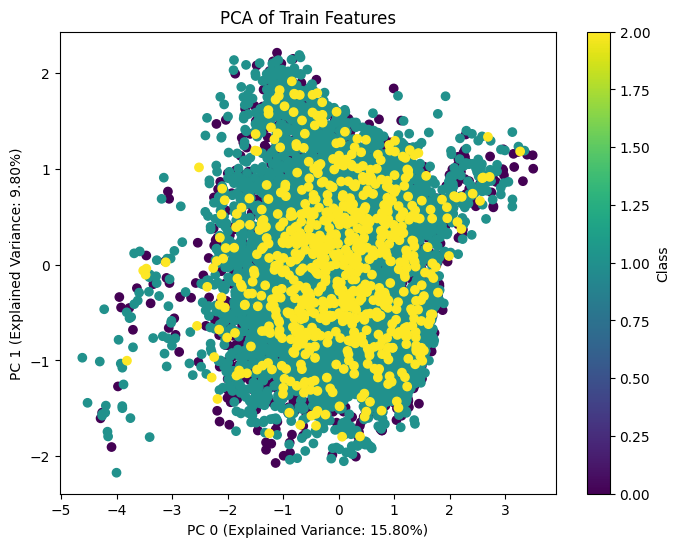

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
train_features_2d = pca.fit_transform(train_features)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(train_features_2d[:, 0], train_features_2d[:, 1], c=train_labels, cmap='viridis')
plt.xlabel(f'PC 0 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC 1 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA of Train Features')
plt.colorbar(scatter, label='Class')
plt.show()

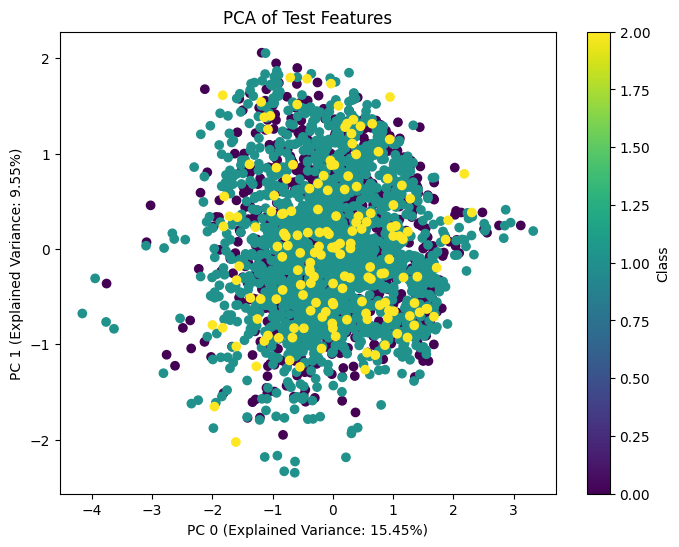

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
test_features_2d = pca.fit_transform(test_features)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(test_features_2d[:, 0], test_features_2d[:, 1], c=test_labels, cmap='viridis')
plt.xlabel(f'PC 0 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC 1 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA of Test Features')
plt.colorbar(scatter, label='Class')
plt.show()

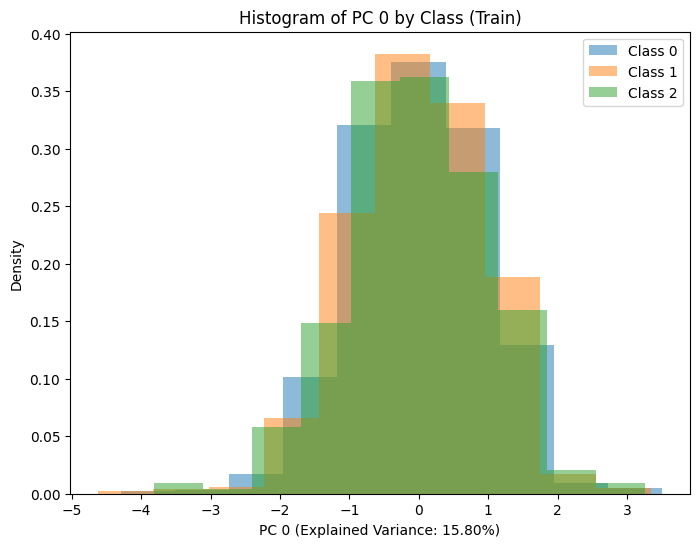

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
train_features_2d = pca.fit_transform(train_features)
plt.figure(figsize=(8, 6))
for cls in np.unique(train_labels):
    plt.hist(train_features_2d[train_labels == cls, 0], alpha=0.5, label=f'Class {cls}', density=True)
plt.xlabel(f'PC 0 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel('Density')
plt.title('Histogram of PC 0 by Class (Train)')
plt.legend()
plt.show()

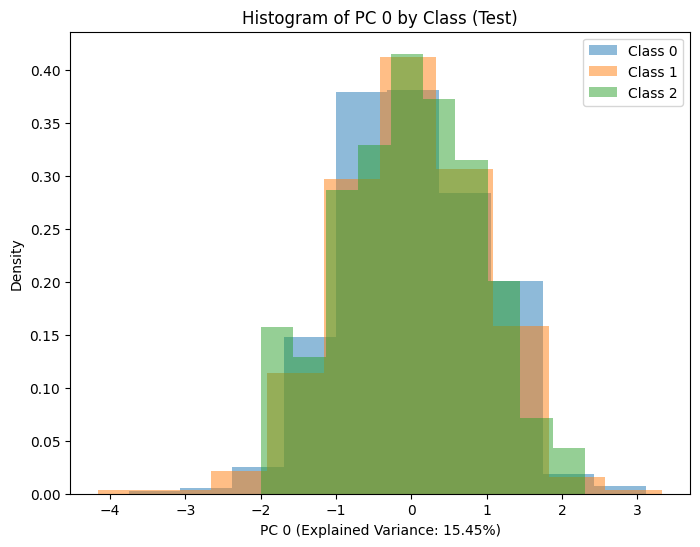

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
test_features_2d = pca.fit_transform(test_features)
plt.figure(figsize=(8, 6))
for cls in np.unique(test_labels):
    plt.hist(test_features_2d[test_labels == cls, 0], alpha=0.5, label=f'Class {cls}', density=True)
plt.xlabel(f'PC 0 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel('Density')
plt.title('Histogram of PC 0 by Class (Test)')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


428/428 ━━━━━━━━━━━━━━━━━━━━ 105s 243ms/step


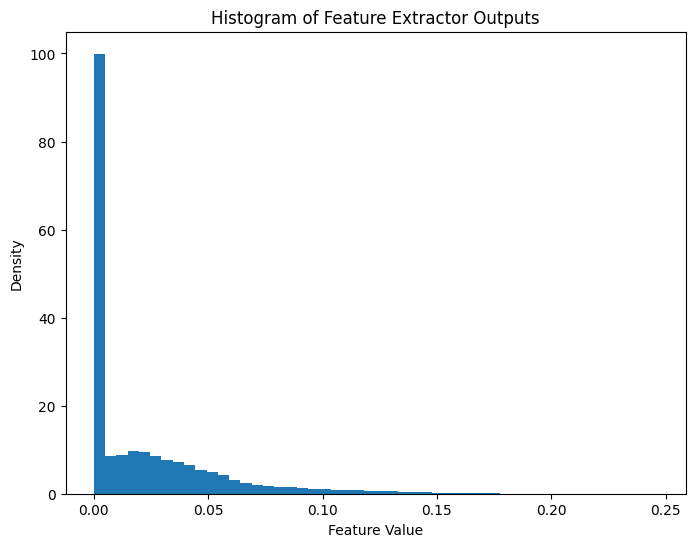

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_extractor = create_feature_extractor()
train_features_flat = feature_extractor.predict(train_generator).flatten()
plt.figure(figsize=(8, 6))
plt.hist(train_features_flat, bins=50, density=True)
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Histogram of Feature Extractor Outputs')
plt.show()

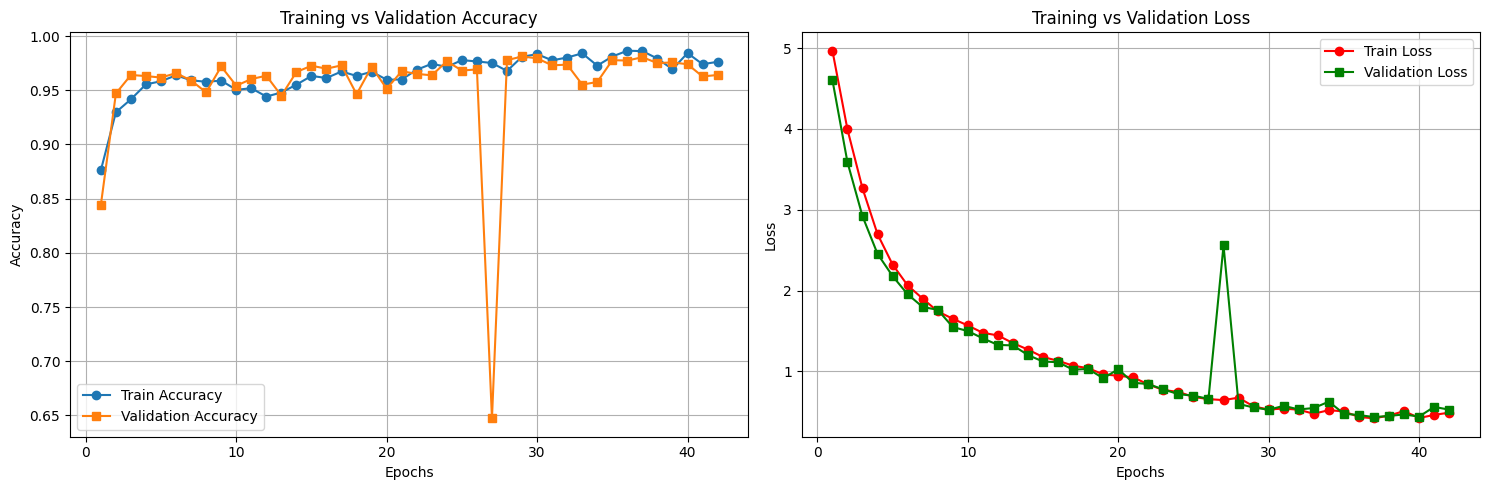

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Graph
axes[0].plot(epochs, train_acc, label="Train Accuracy", marker='o')
axes[0].plot(epochs, val_acc, label="Validation Accuracy", marker='s')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Training vs Validation Accuracy")
axes[0].legend()
axes[0].grid()

# Loss Graph
axes[1].plot(epochs, train_loss, label="Train Loss", marker='o', color='red')
axes[1].plot(epochs, val_loss, label="Validation Loss", marker='s', color='green')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training vs Validation Loss")
axes[1].legend()
axes[1].grid()

# Show both graphs
plt.tight_layout()
plt.show()

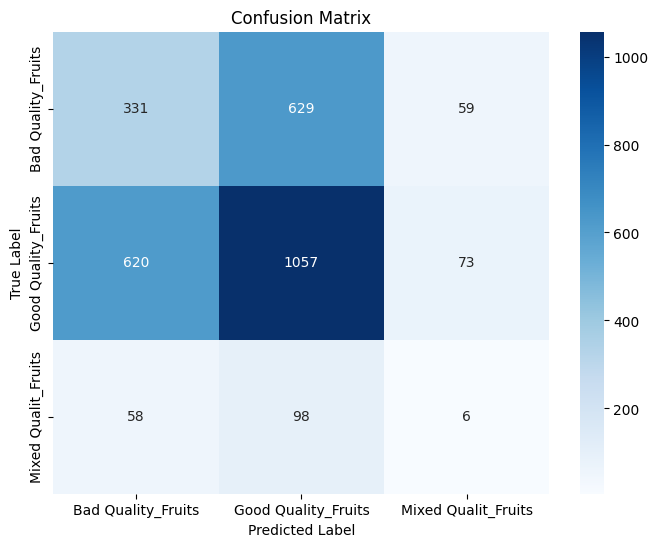

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

Classification Report:
                      precision    recall  f1-score   support

 Bad Quality_Fruits       0.33      0.32      0.33      1019
Good Quality_Fruits       0.59      0.60      0.60      1750
Mixed Qualit_Fruits       0.04      0.04      0.04       162

           accuracy                           0.48      2931
          macro avg       0.32      0.32      0.32      2931
       weighted avg       0.47      0.48      0.47      2931



# **Predictions**

In [ ]:
model.save("fruit_quality_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
model = keras.models.load_model("fruit_quality_cnn_model.h5")

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print(f"Predicted Class: {predicted_class}")

In [ ]:
predict_image("Unknown.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Predicted Class: Bad Quality_Fruits


In [ ]:
predict_image("Unknown-ba.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: Good Quality_Fruits
